## GRIP @ The Sparks Foundation

## Task 1 : Prediction using Supervised Machine Learning
### Author : Pallavi Bankar

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
This is a simple linear regression task as it involves just two variables.

###  Technical Stack : Scikit Learn, Numpy Array, Pandas, Matplotlib

In [42]:
# Importing the required libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 1 - Reading the data from source

In [43]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data import successfully")

s_data.head(10)

Data import successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step 2 - Input data Visualization

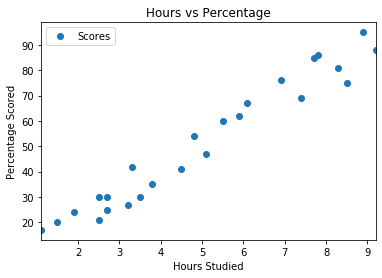

In [44]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.

### Step 3 - Data Preprocessing
This step involved division of data into "attributes" as(inputs) and "labels" as(outputs).

In [45]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

### Step 4 - Model Training
Splitting the data into training and testing sets, and training the algorithm.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training completed.")

Training completed.


### Step 5 - Plotting the Line of regression
Now since our model is trained now, its the time to visualize the best-fit line of regression.

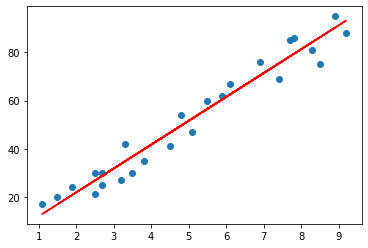

In [47]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red');
plt.show()

### Step 6 - Making Predictions
Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [48]:
# Testing data
print(X_test)
# Model Prediction 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Step 7 - Comparing Actual result to the Predicted Model result

In [49]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [50]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))

print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


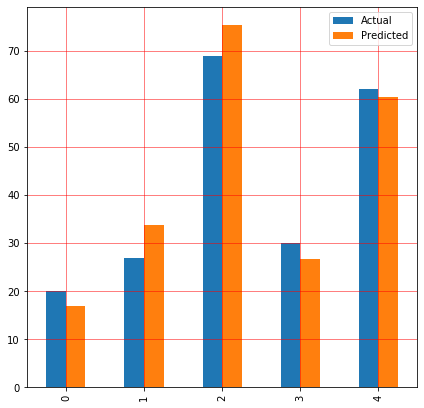

In [51]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [52]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Step 8 - Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [53]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

### Step 9 - Score Prediction for 9.25 hrs/day

In [54]:
## function to take 'Hours' and predict the 'Marks'
def predictMarks(hour = None):
  if hour is None:
    hour = round(randint(4,11))
  
  hour = np.array(hour)
  marks = regressor.predict(hour.reshape(-1, 1))

  print("Hours = {} \t|\t Marks = {}".format(hour, marks[0]))

In [55]:
predictMarks(9.25)

Hours = 9.25 	|	 Marks = 93.69173248737539



### Conclusion
#### I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.
### Thank You !